In [1]:
# all the imports needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/electricity_bill_dataset.csv")

In [3]:
# printing the dataset
print(df.head())

   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8       

In [4]:
# checking the info of our dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB
None


In [5]:
# encoding cities and companies to numbers to use them in our model
named_categories = ['City','Company']
encoders = {}

for col in named_categories:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le 


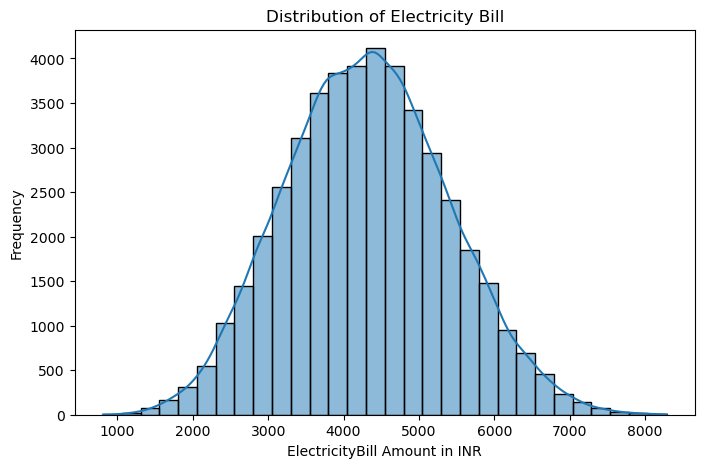

In [6]:
# checking the distrbtion of the required answer ( ELECTRIC BILL)

plt.figure(figsize=(8,5))
sns.histplot(df['ElectricityBill'], bins=30, kde=True)
plt.title("Distribution of Electricity Bill")
plt.xlabel("ElectricityBill Amount in INR")
plt.ylabel("Frequency")
plt.show()

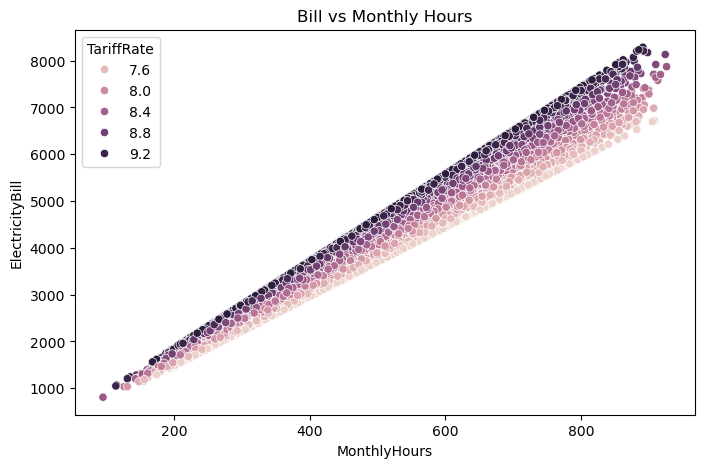

In [7]:
# checking the variation of electricbill with hours and tariffrate
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='MonthlyHours', y='ElectricityBill', hue='TariffRate')
plt.title("Bill vs Monthly Hours")
plt.show()

In [8]:
X = df.drop("ElectricityBill", axis=1)
y = df["ElectricityBill"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [ ]:
#using randomforestregressor as our model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=41,n_estimators=15)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=41)

In [10]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"RandomForestRegressor R²: {r2}")

RMSE: 5.308435132562285
RandomForestRegressor R²: 0.9999754457723234


In [11]:
# Example data
new_data = {
    'Fan': [10],
    'Refrigerator': [100.0],
    'AirConditioner': [2.0],
    'Television': [5.0],
    'Monitor': [10.0],
    'MotorPump': [0],
    'Month': [6],
    'City': ['Mumbai'],
    'Company': ['Tata Power Company Ltd.'],
    'MonthlyHours': [400],
    'TariffRate': [8.5]
}


new_df = pd.DataFrame(new_data)


for col in ['City', 'Company']:
    new_df[col] = encoders[col].transform(new_df[col])

# Predict
predicted_bill = model.predict(new_df)
print(f"Predicted Electricity Bill: {predicted_bill[0]}")

Predicted Electricity Bill: 3396.435


In [12]:

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R²: {lr_r2}")

Linear Regression RMSE: 70.22592805312424
Linear Regression R²: 0.9957027737167402


In [13]:


joblib.dump(model, '../data/rf_model.joblib')
joblib.dump(encoders, '../data/encoders.joblib')

['../data/encoders.joblib']